Analisis de un amplificador clase B exitado con AM.

Se estudiara la respuesta de un amplificador clase B exitado con una senal AM. 

La transferencia del transistor se define en la funcion idi(v).




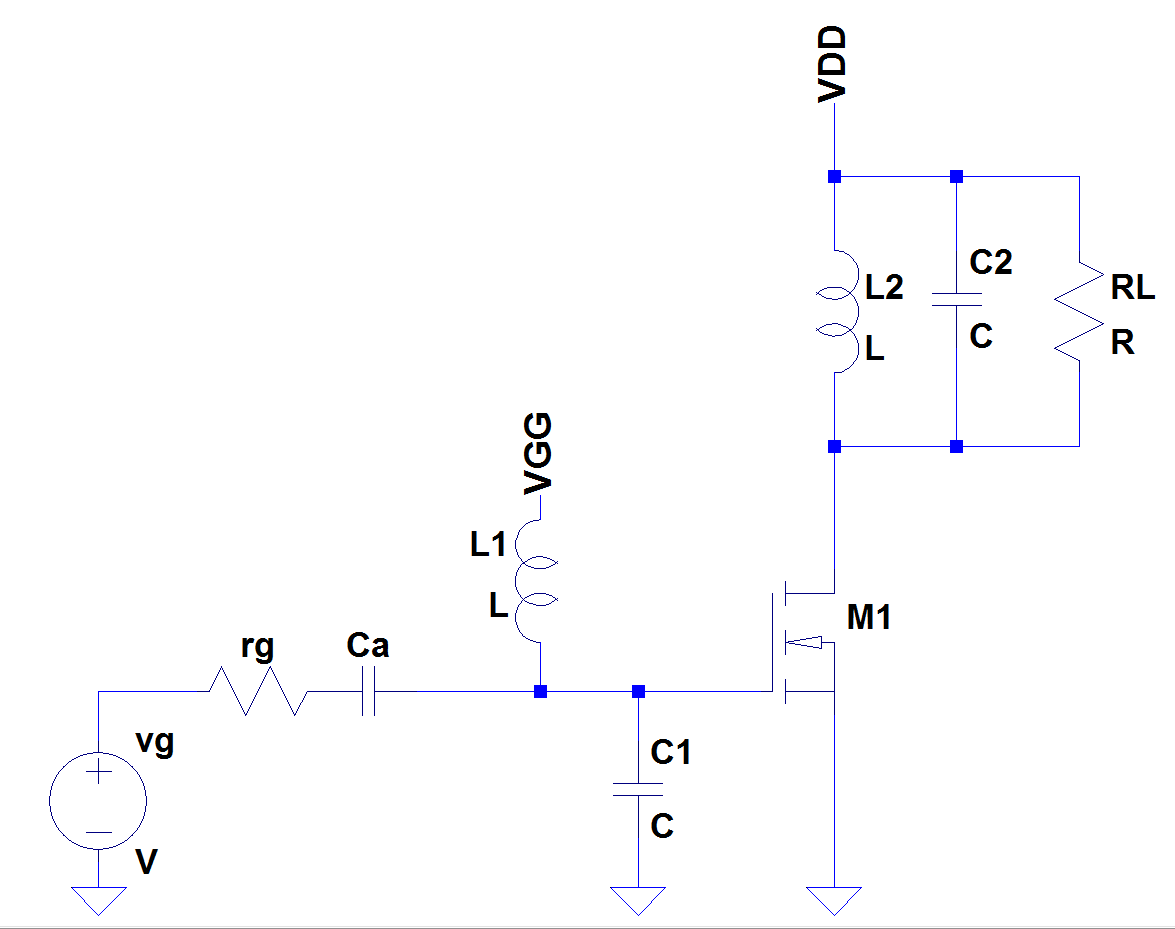

In [53]:
import pandas as pd
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
from scipy import signal
params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

Image(filename= "/home/aalmela/Dropbox/EAIII/04- Ejercitacion/clase c/figures/ejercicio_1lt.png",width=550)

Se definen las señales a utiilizar.

In [54]:
def myFourier(armonicos, x, y, dt, Tm):
    y_f = list()
    for a in armonicos: 
        if a == 0 : 
            yf_o = 0.0
            for i,xi in enumerate(x):
                yf_o += y[i]*dt/Tm
            y_f.append(yf_o)
        else : 
            yf_ac = 0.0
            yf_as = 0.0

            for i,xi in enumerate(x):
                yf_ac += 2.*dt/Tm * y[i]*np.cos(2*np.pi*a*xi)
                yf_as += 2.*dt/Tm * y[i]*np.sin(2*np.pi*a*xi)
            y_f.append(yf_as+yf_ac)
    return y_f

def myFourierPh(a, x, y, n):
    if a == 0 : 
        yf_o = 0.0
        for i,xi in enumerate(x):
            yf_o += y[i]*1/n
        y_f= yf_o
    else : 
        yf_ac = 0.0
        yf_as = 0.0

        for i,xi in enumerate(x):
            yf_ac += 2/n * y[i]*np.cos(a*xi)
            yf_as += 2/n * y[i]*np.sin(a*xi)
        y_f = (yf_as+yf_ac)
    return y_f


In [55]:
#parametros de la senal AM
amp = 10    #amplitud de la portadora
fc = 100    #frecuencia de la portadora
m = 0.5      #indice de modulacion
fm = 2     #frecuencia de la modulante

#tiempo de un periodo de la modulante
Tm  = 1/fm

#Muestreo
fs  =  24*fc

#delta time para el calculo de los armonicos
ds  = 1/(fs)

#parametros del filtro de salida
fo = fc
BW = 2*fm*5
Qc = fo/BW

#parametros del transistor
Vgs_min = 10 
Vgs_max = 200

Respesta del transistor

Esta funcion representa la respuesta del transistor

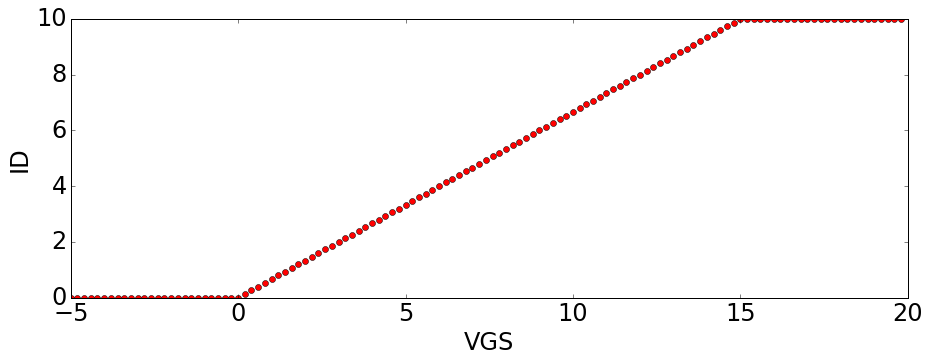

In [56]:
def vgsi(VGG,Vs,th):
    return VGG+Vs*cos(th)

def idi(v):
    i = 0. if (v < 0.)  else 0
    i = (10./15.)*(v-0.) if (v >= 0  and v < 15) else i
    i = (10.) if (v >= 15 ) else i
    return i
vgs = np.arange(-5.,20.,0.2)

ids = []
for v in vgs:
    ids.append(idi(v))
#%matplotlib inline
#plt.gca().cla()
plt.plot(vgs,ids,'ro')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.rcParams['figure.figsize'] = (20.0, 4.0)
plt.show()

Plot de la respesta

Se define la funcion de la tension de entrada vgs como una senal AM

In [57]:
def vam(amp,m,vm,th):
    return amp*(1+m*vm)*cos(th)

def sqr(amp,d,th):
    return signal.square(th+np.pi/2,duty=d) 


Plot de la senal AM

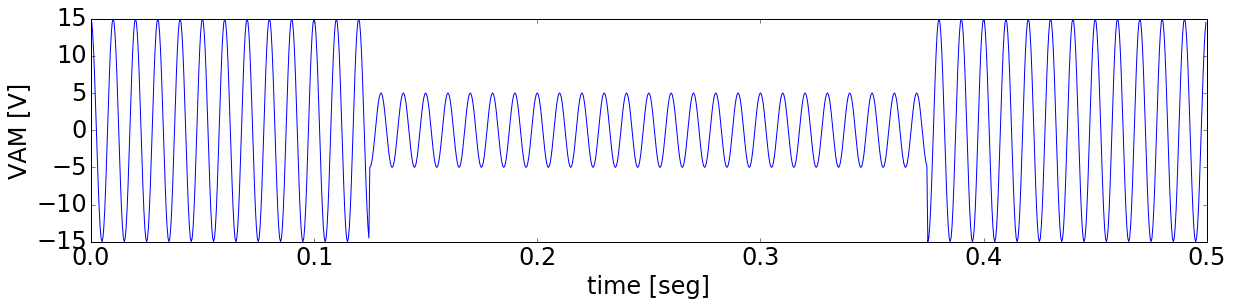

In [58]:
time = np.arange(0,Tm,ds)
vgs = []
for t in time:
    vm =  sqr(1,0.5,2*np.pi*fm*t)
    vgs.append(vam(amp, m ,vm,2*np.pi*fc*t))

plt.plot(time,vgs)
plt.xlabel('time [seg]')
plt.ylabel('VAM [V]')
plt.show()

Analisis de Fourier para la senal AM de entrada

In [59]:
vin_f = []
maxArmon = int(fs/fm)/2
armonicos = np.arange(0,fm*maxArmon,fm)
vin_f = myFourier(armonicos, time, vgs, ds, Tm)
       


(0, 220)

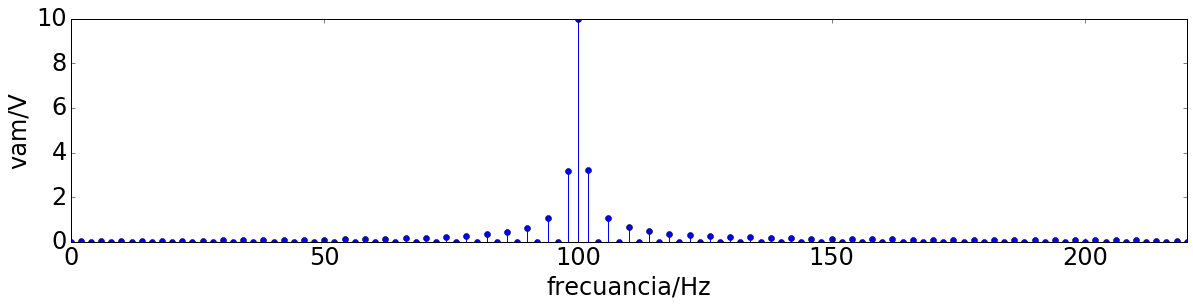

In [60]:
plt.stem(armonicos[:],np.abs(vin_f[:])) 
plt.xlabel('frecuancia/Hz')
plt.ylabel('vam/V')
plt.xlim([0,220])

Corriente de salida del transistor 

En un clase B todos los pulsos de corriente tiene un angulo de circulacion 

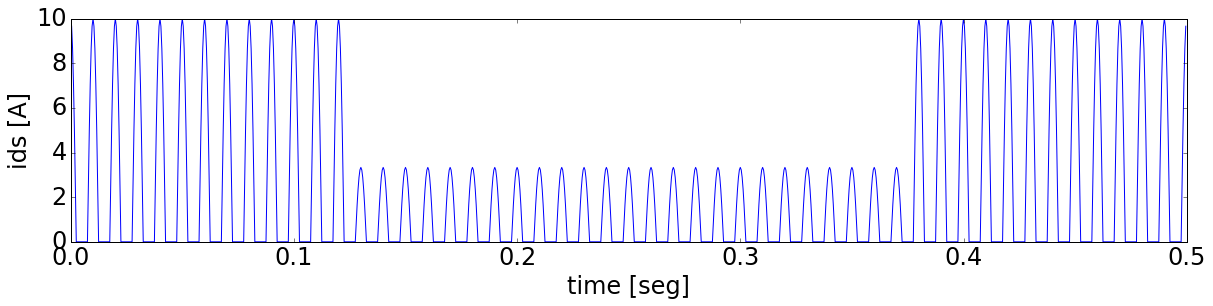

In [61]:
ids = []
for x,t in enumerate(time):
    ids.append(idi(vgs[x]))

plt.plot(time,ids)
plt.xlabel('time [seg]')
plt.ylabel('ids [A]')

Analisis de Fourier para la corriente de salida

In [62]:
ids_mf = myFourier(armonicos, time, ids, ds, Tm)

(0, 220)

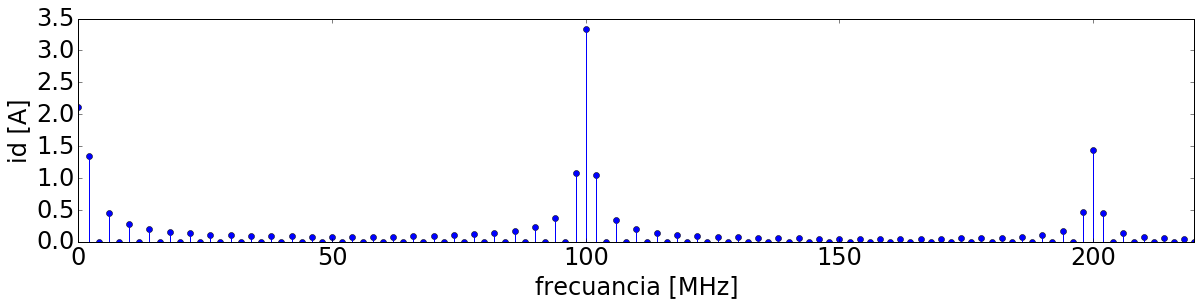

In [63]:
plt.stem(armonicos[:],np.abs(ids_mf[:]) ) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('id [A]')
plt.xlim([0,220])

Analisis de la senal de salida
Calculo de primer armonico y continua de la portadora cada 360/n grados de la modulante

In [64]:
n    = 24
th_c = np.arange(-np.pi,np.pi,2*np.pi/n)
th_m = np.arange(-np.pi,np.pi,2*np.pi/n)

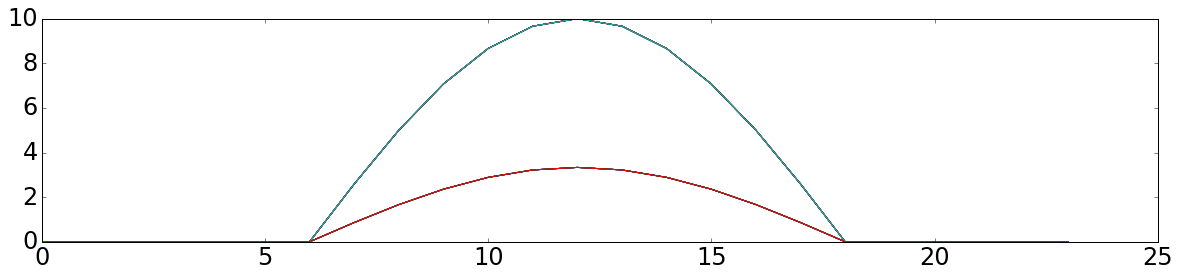

In [65]:
ids_f = dict() # corriente de salida
comp  = [0,1,2,3,4,5,6,7]

for t_m in th_m: # cada 360/n grados de la modulante
    
    ids = list()    
    for t_c in th_c: # calculo DC y primer armonico de la portadora
        vm  = sqr(1,0.5,t_m)
        vgs = vam(amp,m,vm,t_c)
        
        ids.append(idi(vgs))
    plt.plot(ids)    
    for a in comp:
        if a not in ids_f : ids_f[a] = dict()
        if t_m not in ids_f[a] : 
            ids_f[a][t_m] = myFourierPh(a, th_c, ids, n)




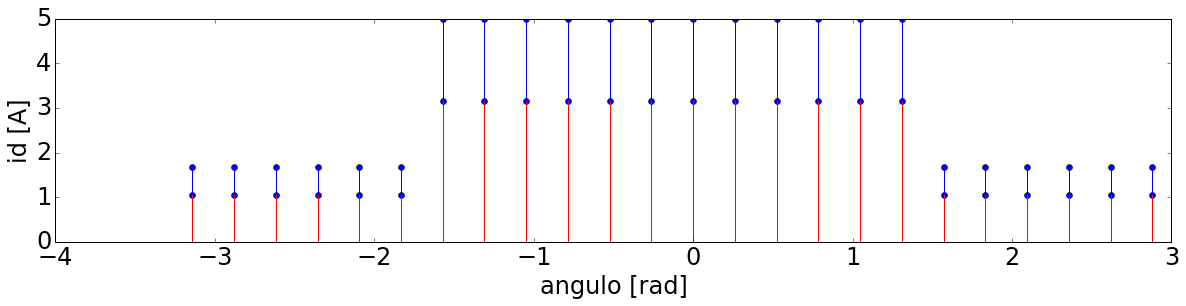

In [66]:
plt.stem(th_m,[ids_f[1][t_m] for t_m in th_m] )
plt.stem(th_m,[ids_f[0][t_m] for t_m in th_m] ,'r')
plt.xlabel('angulo [rad]')
plt.ylabel('id [A]')
#print(id1)

In [67]:
#Portadora
idco = ids_f[0][th_m[6]]
idc1 = ids_f[1][th_m[6]]

#Poradora en condicion de Pico
idpo = ids_f[0][th_m[12]]
idp1 = ids_f[1][th_m[12]]

#Poradora en condicion de valle
idvo = ids_f[0][th_m[0]]
idv1 = ids_f[1][th_m[0]]

print('Portadora                                                =>  idco=',idco,'A ,  idc1=',idc1,'A' )
print('Portadora en pico de modulante (solo el primer arminico) => idcpo=',idpo,'A , idcp1=',idp1,'A')
print('Portadora en valle de modulante (solo el primer arminico)=> idcvo=',idvo,'A , idcv1=',idv1,'A')



Portadora                                                =>  idco= 3.16489754697 A ,  idc1= 5.0 A
Portadora en pico de modulante (solo el primer arminico) => idcpo= 3.16489754697 A , idcp1= 5.0 A
Portadora en valle de modulante (solo el primer arminico)=> idcvo= 1.05496584899 A , idcv1= 1.66666666667 A


In [68]:
#calculo de la resistencia de carga de salida teniendo la portadora en pico para el primer armonico de la modulante
Vp  = (Vgs_max-Vgs_min)/ 2
VDD = Vp + Vgs_min
print('VDD=', VDD, 'V')
print('Vp=' , Vp, 'V')

RL = Vp /idp1
print('RL=', RL, 'ohms')
 

VDD= 105.0 V
Vp= 95.0 V
RL= 19.0 ohms


Calculo de las potencias

In [69]:
#Portadora
PDC_c = idco * VDD
PRL_c = idc1 * Vp / 2
PTR_c = PDC_c - PRL_c

#Portadora en pico 
PDC_cp = idpo * VDD
PRL_cp = idp1 * Vp / 2
PTR_cp = PDC_cp - PRL_cp

#Portadora en valle 
PDC_cv = idvo * VDD
PRL_cv = idv1 * Vp / 2
PTR_cv = PDC_cv - PRL_cv


print('Potencia de portadora            => PDC =', PDC_c, 'W, PRL=', PRL_c, 'W, PTR=',  PTR_c, 'W.', 'n=',PRL_c/PDC_c )
print('Potencia de portadora en pico    => PDC =', PDC_cp,'W, PRL=', PRL_cp,'W, PTR=',  PTR_cp, 'W.',  'n=',PRL_cp/PDC_cp )
print('Potencia de portadora en valle   => PDC =', PDC_cv,'W, PRL=', PRL_cv,'W, PTR=',  PTR_cv, 'W.', 'n=',PRL_cv/PDC_cv )


Potencia de portadora            => PDC = 332.314242432 W, PRL= 237.5 W, PTR= 94.8142424317 W. n= 0.714684986903
Potencia de portadora en pico    => PDC = 332.314242432 W, PRL= 237.5 W, PTR= 94.8142424317 W. n= 0.714684986903
Potencia de portadora en valle   => PDC = 110.771414144 W, PRL= 79.1666666667 W, PTR= 31.6047474772 W. n= 0.714684986903


Estos pulsos de corriente son filtrados por un simple sintonizado 

In [70]:
def SS(vin,f, Qc, fo):
    return vin*abs(1/(1+(Qc*(f/fo-fo/f))**2)**0.5)

(0, 220)

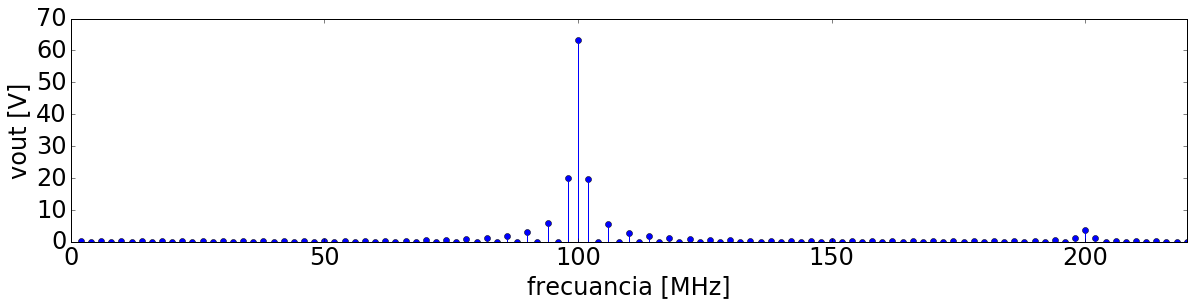

In [72]:
#calculo de la transferencia del filtro
vout_f = []
for x,i in enumerate(ids_mf[1:]):
    vout_f.append(SS(i*RL,armonicos[x+1],Qc,fo))
    
plt.stem(armonicos[1:],np.abs(vout_f[:])) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('vout [V]')
plt.xlim([0,220])

Calculo de la disrtorsión 

In [73]:
id1_o = 1/n * sum([ids_f[1][t_m] for t_m in th_m] )
id1s  = [ids_f[1][t_m] for t_m in th_m] 
for x,t in enumerate(th_m):
    id1s[x] = id1s[x] - id1_o 
    
print(id1_o)    

3.33333333333


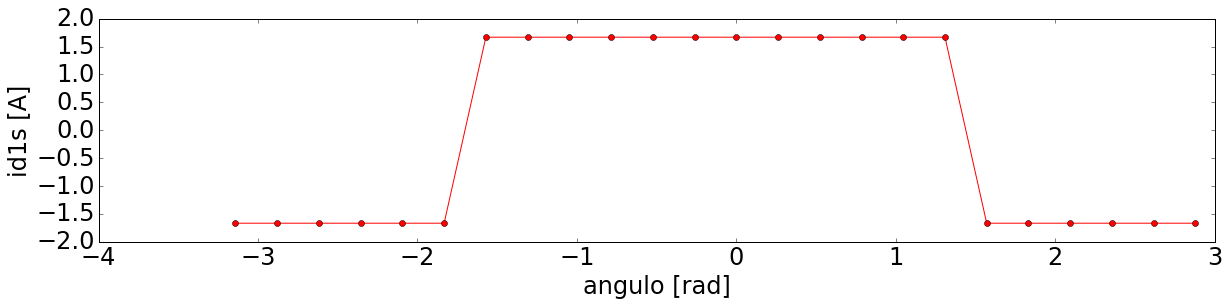

In [74]:
plt.plot(th_m,id1s, 'ro-') 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

Para el calculo de la distorsion, Dist = 2 Veff/(v_1)^2 - 1 

In [75]:
ieff = 0.0
for x,t_m in enumerate(th_m) :
    ieff = ieff + id1s[x]**2
ieff = (ieff / n)
print('De la envolvente ieff=',ieff)

De la envolvente ieff= 2.77777777778


In [76]:
id1s_f = []

for x, t_m in enumerate(th_m): # cada 360/n grados de la modulante
    id1s_f.append(id1s[x]*cos(t_m))
id1s_1 = (2/n * sum(id1s_f))

print('De la envolvente id1=',id1s_1)


De la envolvente id1= 2.10993169798


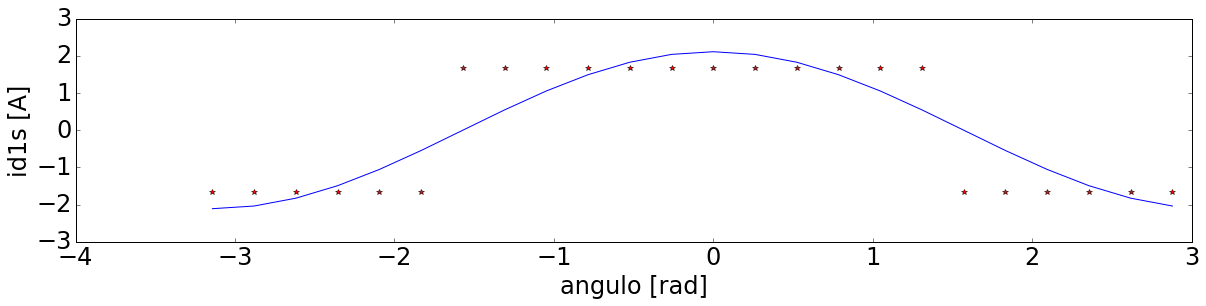

In [77]:
id1st = []
for t_m in th_m:
    id1st.append(id1s_1*cos(t_m))
    
plt.plot(th_m,id1s,'r*', th_m,id1st, 'b-') 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

In [78]:
dist = (2*ieff/id1s_1**2 - 1) * 100

print('distorsion=',  dist ,'%')


distorsion= 24.7931368712 %


In [79]:
id1s_f = list()
for a in comp:
    id1s_f.append( myFourierPh(a, th_m, id1s, n) )
    
    
dist = (sum( [i_f**2 for i_f in id1s_f[2:]] ) )**0.5/id1s_f[1]
print(dist)

0.222105204443
